# Erasmus Neural Networks
http://michalbereta.pl/nn

## CIFAR10


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### CIFAR10 dataset

More info:  https://www.cs.toronto.edu/~kriz/cifar.html

Download:  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Extract the archive to your folder.

## Some utility functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def load_batch(path):
    with open(path, 'rb') as f:
        d = pickle.load(f, encoding='bytes')
    return d

def get_cifar10_train(path):
    temp = load_batch(path+'\\'+'data_batch_1')
    data = temp[b'data']
    labels = np.array(temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_2')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_3')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_4')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_5')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])    
    return data, labels

def get_cifar10_test(path):
    temp = load_batch(path+'\\'+'test_batch')
    data = temp[b'data']
    labels = np.array(temp[b'labels'])
    return data, labels

## Read sample images from CIFAR10

(50000, 3072)
uint8
(50000,)
int32
(10000, 3072)
uint8
(10000,)
int32
(3072,)
(32, 32, 3)


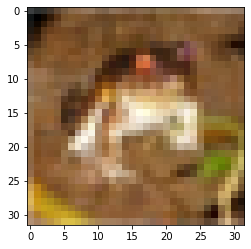

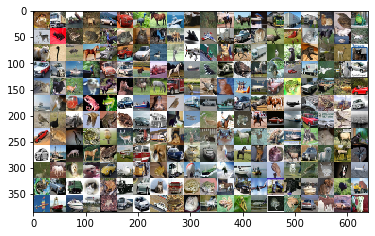

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

X, labels = get_cifar10_train('cifar-10-batches-py')
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

Xte, labelste = get_cifar10_test('cifar-10-batches-py')
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)

##display the first of the train images
im = X[0,:] 
print(im.shape)
im = np.dstack((im[:1024].reshape((32,32)),im[1024:2048].reshape((32,32)),im[2048:].reshape((32,32))))
print(im.shape)
#print(im)
plt.imshow(im)



#generate a display of several first images
rows = 12
cols = 20
counter = 0

images = None

for i in range(rows):
    current_row = None
    for j in range(cols):
        im = X[counter,:]
        im = np.dstack((im[:1024].reshape((32,32)),im[1024:2048].reshape((32,32)),im[2048:].reshape((32,32))))
        counter = counter + 1
        if current_row is None:
            current_row = im
        else:
            current_row = np.hstack((current_row, im))
    if images is None:
        images = current_row
    else:
        images = np.vstack((images, current_row))
        
plt.figure()
plt.imshow(images)

plt.show()

## Example training with linear SoftMax

reading train data...
(50000, 3072)
float64
(50000,)
int32
reading test data...
(10000, 3072)
float64
(10000,)
int32
dloss: 2.326864385417531
erate: 0.88814
errors: 44407
test dloss: 2.3279389390450325
test erate: 0.8847
test errors: 8847

starting learning...

iteration 1
dloss: 2.326453529786637
erate: 0.88828
errors: 44414
test dloss: 2.3275183094739975
test erate: 0.8847
test errors: 8847

iteration 2
dloss: 2.326047305795933
erate: 0.88844
errors: 44422
test dloss: 2.327102418842266
test erate: 0.8848
test errors: 8848

iteration 3
dloss: 2.325645649399245
erate: 0.88834
errors: 44417
test dloss: 2.326691201963082
test erate: 0.8845
test errors: 8845

iteration 4
dloss: 2.325248497426874
erate: 0.88838
errors: 44419
test dloss: 2.3262845945388624
test erate: 0.8849
test errors: 8849

iteration 5
dloss: 2.3248557875739584
erate: 0.8884
errors: 44420
test dloss: 2.3258825331494086
test erate: 0.8855
test errors: 8855

iteration 6
dloss: 2.324467458388972
erate: 0.88868
errors: 44434


iteration 60
dloss: 2.3085898740263326
erate: 0.88776
errors: 44388
test dloss: 2.3092343456076314
test erate: 0.8859
test errors: 8859

iteration 61
dloss: 2.3083685876682165
erate: 0.88758
errors: 44379
test dloss: 2.3090080755762457
test erate: 0.8859
test errors: 8859

iteration 62
dloss: 2.3081493058255997
erate: 0.8874
errors: 44370
test dloss: 2.308783867102512
test erate: 0.8855
test errors: 8855

iteration 63
dloss: 2.307932000696198
erate: 0.88744
errors: 44372
test dloss: 2.3085616917954566
test erate: 0.8853
test errors: 8853

iteration 64
dloss: 2.307716644864617
erate: 0.88732
errors: 44366
test dloss: 2.308341521657349
test erate: 0.8853
test errors: 8853

iteration 65
dloss: 2.307503211297047
erate: 0.88738
errors: 44369
test dloss: 2.308123329078321
test erate: 0.8852
test errors: 8852

iteration 66
dloss: 2.307291673336023
erate: 0.88734
errors: 44367
test dloss: 2.307907086831067
test erate: 0.8851
test errors: 8851

iteration 67
dloss: 2.3070820046952627
erate: 0.8

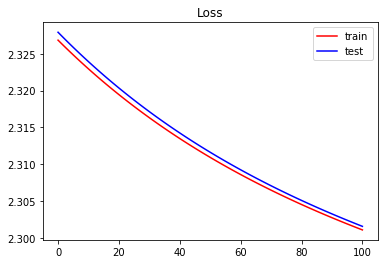

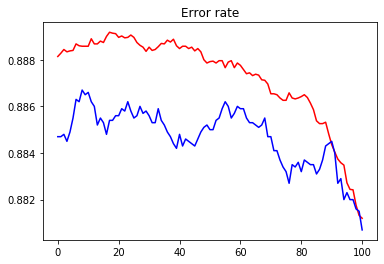

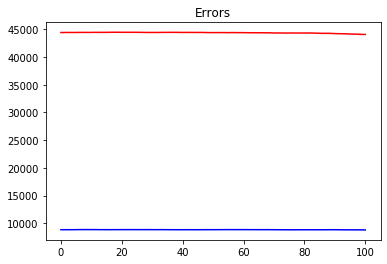

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
       
        
        


#train data
print('reading train data...')
X, labels = get_cifar10_train('cifar-10-batches-py')
X = X/255.0 #simple normalization
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

#test data
print('reading test data...')
Xte, labelste = get_cifar10_test('cifar-10-batches-py')
Xte = Xte/255.0 #simple normalization
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)



net = SoftMaxLinear(3072, 10) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print()

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1
while True:
    net.Learn(X, labels, 0.0001)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax_cifar10.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()


## Task 1

- Use MLP and SoftMax with hidden layer(s) to train on CIFAR10, and check how much you can improve over linear SoftMax.

- Does regularization help to improve the test results?

- Prepare a report presenting your results. Send a pdf file with the report. Attach the source codes. Do not attach the databases.

- Send also the saved trained classifiers – check pickle_example to see how to save objects (your nets). Prepare the code to load the saved network and check the test results.

### MLP1HL

In [8]:
import numpy as np

class MLP1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector
#        limit1 = 4*np.sqrt(6.0/(inputs_num+hidden_num))
#        self.W1 = -limit1 + 2*limit1*np.random.rand(inputs_num, hidden_num) #neurons as columns        
#        limit2 = 4*np.sqrt(6.0/(hidden_num+outputs_num))
#        self.W2 = -limit2 + 2*limit2*np.random.rand(hidden_num, outputs_num) #neurons as columns
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        self.outs = np.dot(self.hout, self.W2) + self.b2
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.outs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.outs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, D):
        self.mse = np.linalg.norm(self.outs - D, axis=1).sum()/D.shape[0]
        return self.mse
    def LearnClassification(self, X, ClsIndx, lrate):
        pass
    def Update(self, X, D, lrate):
        #self.Forward(X)
        #gradients of outputs 
        ex_num = X.shape[0]
        dY = self.outs - D
        dY /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dY) # chain rule to calculate gradients
        db2 = np.sum(dY, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dY, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1
    def Learn(self, X, D, epochs, lrate):
        self.stats = []
        self.Forward(X)
        for i in range(epochs):
            self.Update(X, D, lrate)
            self.Forward(X)
            self.stats.append(self.GetMSE(D))

#train data
print('reading train data...')
X, labels = get_cifar10_train('cifar-10-batches-py')
X = X/255.0 #simple normalization
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

#test data
print('reading test data...')
Xte, labelste = get_cifar10_test('cifar-10-batches-py')
Xte = Xte/255.0 #simple normalization
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)



net = MLP1HL(3072, 10, 20) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print()

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1
while True:
    net.Learn(X, labels, max_iters, 0.0001)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_mlp1hl_cifar10.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()

reading train data...
(50000, 3072)
float64
(50000,)
int32
reading test data...
(10000, 3072)
float64
(10000,)
int32


D:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


dloss: nan
erate: 0.9
errors: 45000
test dloss: nan
test erate: 0.9
test errors: 9000

starting learning...


ValueError: operands could not be broadcast together with shapes (50000,10) (50000,) 

### Softmax1HL

reading train data...
(50000, 3072)
float64
(50000,)
int32
reading test data...
(10000, 3072)
float64
(10000,)
int32
dloss: 2.3326433388582024
erate: 0.9064
errors: 45320
test dloss: 2.33266416607537
test erate: 0.9061
test errors: 9061

starting learning...

iteration 1
dloss: 2.3302100285527705
erate: 0.90586
errors: 45293
test dloss: 2.33023256579944
test erate: 0.9067
test errors: 9067

iteration 2
dloss: 2.3279355903022605
erate: 0.90582
errors: 45291
test dloss: 2.327960344559184
test erate: 0.907
test errors: 9070

iteration 3
dloss: 2.325811473322873
erate: 0.90576
errors: 45288
test dloss: 2.3258388666611767
test erate: 0.9075
test errors: 9075

iteration 4
dloss: 2.32382893400393
erate: 0.90564
errors: 45282
test dloss: 2.3238593107979484
test erate: 0.9073
test errors: 9073

iteration 5
dloss: 2.3219791759664474
erate: 0.9054
errors: 45270
test dloss: 2.322012810331484
test erate: 0.9066
test errors: 9066

iteration 6
dloss: 2.320253478080035
erate: 0.90506
errors: 45253
tes


iteration 60
dloss: 2.2910547679376068
erate: 0.86674
errors: 43337
test dloss: 2.2912039740145804
test erate: 0.8735
test errors: 8735

iteration 61
dloss: 2.290857443751657
erate: 0.86568
errors: 43284
test dloss: 2.291007332038115
test erate: 0.8725
test errors: 8725

iteration 62
dloss: 2.2906631017159005
erate: 0.86496
errors: 43248
test dloss: 2.2908136562130545
test erate: 0.8705
test errors: 8705

iteration 63
dloss: 2.2904716089222608
erate: 0.86412
errors: 43206
test dloss: 2.290622814780409
test erate: 0.8702
test errors: 8702

iteration 64
dloss: 2.290282839711449
erate: 0.86298
errors: 43149
test dloss: 2.2904346831798743
test erate: 0.8691
test errors: 8691

iteration 65
dloss: 2.290096675187909
erate: 0.86218
errors: 43109
test dloss: 2.290249143566675
test erate: 0.8682
test errors: 8682

iteration 66
dloss: 2.2899130027724777
erate: 0.8615
errors: 43075
test dloss: 2.2900660843660847
test erate: 0.8672
test errors: 8672

iteration 67
dloss: 2.289731715789529
erate: 0.

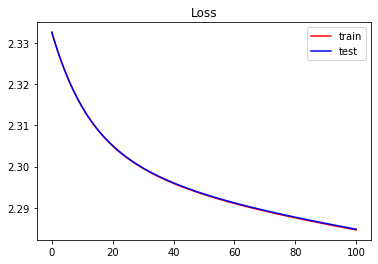

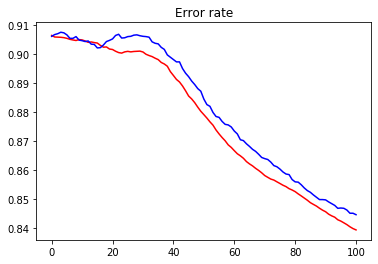

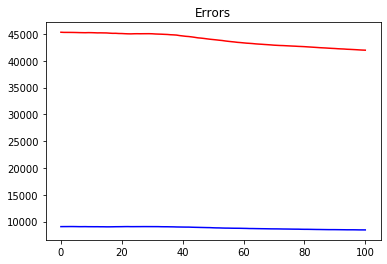

In [11]:
import numpy as np

class SoftMax1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector        
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        f = np.dot(self.hout, self.W2) + self.b2
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
        return self.probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Update(self, X, ClsIndx, lrate): 
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dprobs) # chain rule to calculate gradients
        db2 = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dprobs, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1       
    def Learn(self, X, ClsIndx, epochs, lrate):
        self.Forward(X)
        self.stats = []
        for i in range(epochs):
            self.Update(X, ClsIndx, lrate)
#            self.Forward(X) #not needed if self.Test() is called
            self.stats.append(self.Test(X, ClsIndx)[0])
    
#train data
print('reading train data...')
X, labels = get_cifar10_train('cifar-10-batches-py')
X = X/255.0 #simple normalization
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

#test data
print('reading test data...')
Xte, labelste = get_cifar10_test('cifar-10-batches-py')
Xte = Xte/255.0 #simple normalization
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)



net = SoftMax1HL(3072, 10, 20) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print()

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1
while True:
    net.Learn(X, labels, max_iters, 0.0001)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax1hl_cifar10.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()

### Softmax2HL with Regularization

reading train data...
(50000, 3072)
float64
(50000,)
int32
reading test data...
(10000, 3072)
float64
(10000,)
int32
dloss: 2.3268332855708276
erate: 0.9
errors: 45000
test dloss: 2.3268415915183747
test erate: 0.9
test errors: 9000

starting learning...

iteration 1
dloss: 2.3268266395109323
erate: 0.9
errors: 45000
test dloss: 2.3268349361200884
test erate: 0.9
test errors: 9000

iteration 2
dloss: 2.326819995395022
erate: 0.9
errors: 45000
test dloss: 2.326828282672279
test erate: 0.9
test errors: 9000

iteration 3
dloss: 2.326813353222448
erate: 0.9
errors: 45000
test dloss: 2.326821631174293
test erate: 0.9
test errors: 9000

iteration 4
dloss: 2.32680671299256
erate: 0.9
errors: 45000
test dloss: 2.3268149816254784
test erate: 0.9
test errors: 9000

iteration 5
dloss: 2.32680007470471
erate: 0.9
errors: 45000
test dloss: 2.3268083340251806
test erate: 0.9
test errors: 9000

iteration 6
dloss: 2.3267934383582483
erate: 0.9
errors: 45000
test dloss: 2.326801688372748
test erate: 0.


iteration 63
dloss: 2.326418354766767
erate: 0.9
errors: 45000
test dloss: 2.3264260849163607
test erate: 0.9
test errors: 9000

iteration 64
dloss: 2.326411829920018
erate: 0.9
errors: 45000
test dloss: 2.326419551132458
test erate: 0.9
test errors: 9000

iteration 65
dloss: 2.326405306976853
erate: 0.9
errors: 45000
test dloss: 2.3264130192583825
test erate: 0.9
test errors: 9000

iteration 66
dloss: 2.326398785936639
erate: 0.9
errors: 45000
test dloss: 2.326406489293498
test erate: 0.9
test errors: 9000

iteration 67
dloss: 2.3263922667987442
erate: 0.9
errors: 45000
test dloss: 2.326399961237167
test erate: 0.9
test errors: 9000

iteration 68
dloss: 2.326385749562535
erate: 0.9
errors: 45000
test dloss: 2.326393435088755
test erate: 0.9
test errors: 9000

iteration 69
dloss: 2.326379234227381
erate: 0.9
errors: 45000
test dloss: 2.326386910847624
test erate: 0.9
test errors: 9000

iteration 70
dloss: 2.326372720792648
erate: 0.9
errors: 45000
test dloss: 2.3263803885131398
test e

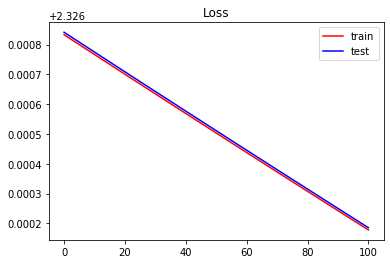

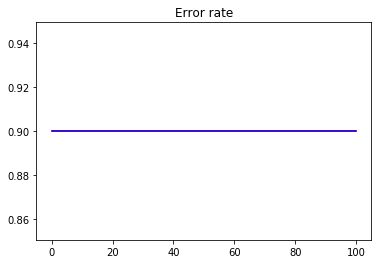

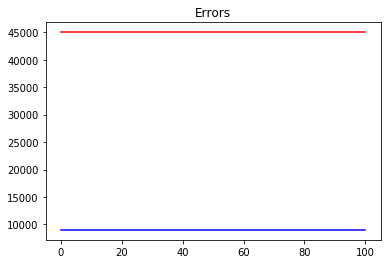

In [14]:
import numpy as np

class SoftMax2HL:
    def __init__(self, inputs_num, outputs_num, hidden_num1, hidden_num2):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num1))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num1)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num1, hidden_num2))/np.sqrt(hidden_num1) #neurons as columns
        self.b2 = np.zeros((1, hidden_num2)) #horizontal vector
        self.W3 = (-1 + 2*np.random.rand(hidden_num2, outputs_num))/np.sqrt(hidden_num2) #neurons as columns
        self.b3 = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u1 = np.dot(X, self.W1) + self.b1
        self.hout1 = 1.0/(1.0 + np.exp(-self.u1))
        self.u2 = np.dot(self.hout1, self.W2) + self.b2
        self.hout2 = 1.0/(1.0 + np.exp(-self.u2))
        f = np.dot(self.hout2, self.W3) + self.b3
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW3 = np.dot(self.hout2.T, dprobs) # chain rule to calculate gradients
        db3 = np.sum(dprobs, axis=0,keepdims=True)
        
        #update neurons - output layer
        lmbda = 0.0001 # regularization parameter
        self.W3 = self.W3 - lrate*dW3 - lmbda*self.W3
        self.b3 = self.b3 - lrate*db3 - lmbda*self.b3
        self.dW3 = dW3
        self.db3 = db3
        
        #gradient of weights and biases - 2 hidden layer
        temp = np.dot(dprobs, self.W3.T)
        du2 = self.hout2*(1 - self.hout2)
        temp = temp * du2  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW2 = np.dot(self.hout1.T, temp) # chain rule to calculate gradients
        db2 = np.sum(temp, axis=0,keepdims=True)
        #update neurons - second hidden layer
        self.W2 = self.W2 - lrate*dW2 - lmbda*self.W2
        self.b2 = self.b2 - lrate*db2 - lmbda*self.b2       
        self.dW2 = dW2
        self.db2 = db2
        
        #gradient of weights and biases - 1 hidden layer
        temp = np.dot(temp, self.W2.T)
        du1 = self.hout1*(1 - self.hout1)
        temp = temp * du1  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons - first hidden layer
        self.W1 = self.W1 - lrate*dW1 - lmbda*self.W1
        self.b1 = self.b1 - lrate*db1 - lmbda*self.b1       
        self.dW1 = dW1
        self.db1 = db1
        
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle       
        


#train data
print('reading train data...')
X, labels = get_cifar10_train('cifar-10-batches-py')
X = X/255.0 #simple normalization
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

#test data
print('reading test data...')
Xte, labelste = get_cifar10_test('cifar-10-batches-py')
Xte = Xte/255.0 #simple normalization
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)



net = SoftMax2HL(3072, 10, 20, 10) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print()

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1
while True:
    net.Learn(X, labels, 0.0001)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax2hl_cifar10.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()